 ## Detecting fake data

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# from sqlalchemy import create_engine
# engine = create_engine('postgresql://localhost:5432/HP_Homework')
# connection = engine.connect()



employees_path = "employees.csv"
departments_path = "departments.csv"
dept_emp_path= "dept_emp.csv"
dept_manager_path="dept_manager.csv"
salaries_path="salaries.csv"
titles_path="titles.csv"

#Reading the all the files
employees = pd.read_csv(employees_path)
departments = pd.read_csv(departments_path)
dept_emp=pd.read_csv(dept_emp_path)
dept_manager=pd.read_csv(dept_manager_path)
salaries=pd.read_csv(salaries_path)
titles=pd.read_csv(titles_path)





### Groupying by salaries helps to visualize the distribution of salaries

In [2]:
salaries=pd.DataFrame(salaries)
salaries_grouped=salaries.groupby('salary').count()
salaries_grouped

,emp_no
salary,
40000,95346
40001,5
40002,10
40003,9
40004,9
...,...
125469,1
126703,1
127041,1


### Let's check what's the min and max salary

In [3]:
max_salary=salaries['salary'].max()
min_salary=salaries['salary'].min()
print(max_salary,min_salary)

129492 40000


### Ploting a histagram to see the distribuition

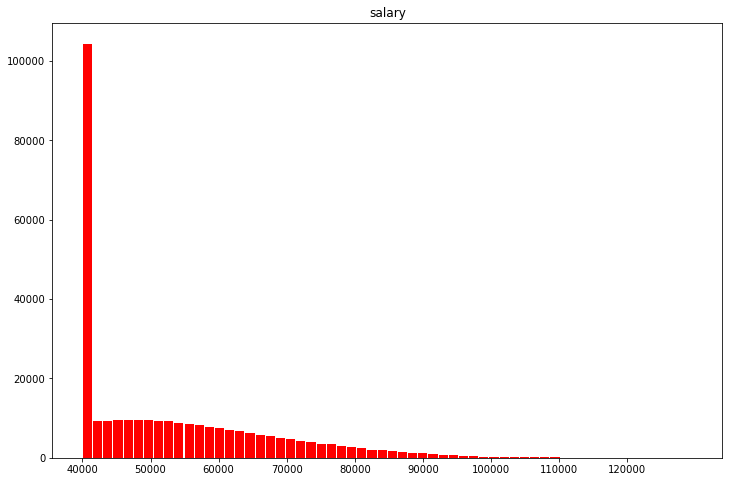

In [4]:
ax = salaries.hist(column='salary', bins=60, grid=False, figsize=(12,8), color='r', zorder=2, rwidth=0.9)

x_ticks = np.arange(40000, 130000, 10000)
plt.xticks(x_ticks)

plt.show()


#Clearly there's something abnormal about this distribution. More than 100K people have exactly the same salary, then, the second salary only differs by $1 or $2

## Understanding salaries per title

In [5]:
titles=pd.DataFrame(titles)
salaries=pd.DataFrame(salaries)

employees=employees.rename(columns={'emp_title_id':'title_id'})

emp_titles=pd.merge(employees,titles, on='title_id' )
emp_titles_salary=pd.merge(emp_titles,salaries, on='emp_no')

title_salary=emp_titles_salary[['title','salary']]
grouped_title_salary=title_salary.groupby('title').mean()
grouped_title_salary

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


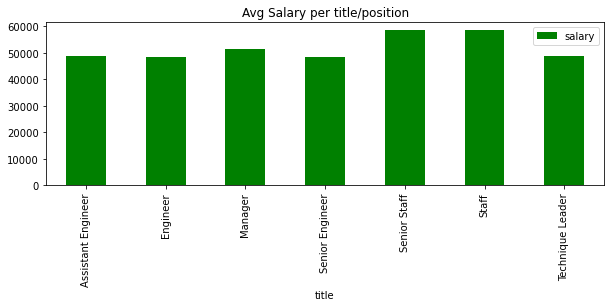

In [6]:
grouped_title_salary.plot(kind="bar", figsize=(10,3), color="g") #using pandas to plot a bar chart, green color.
plt.title("Avg Salary per title/position") #setting title for the plot
plt.show()

#The average salary for staff and Sr Staff are higher than for any other position. The expectation would have been that Staff would have a lower salary compared to other positions. This confirms that the data is not accurate. 

## Looking for my ID

In [7]:
looking_my_id=employees.loc[employees['emp_no'] == 499942]
looking_my_id[['first_name','last_name']]

,first_name,last_name
168736,April,Foolsday


# I've been fooled !!